In [38]:
import pandas as pd

In [39]:
cr = pd.read_csv(r"CreditRisk.csv")

In [40]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [41]:
cr.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [42]:
cr.Gender              = cr.Gender.fillna('Male')
cr.Married             = cr.Married .fillna('No')
cr.Dependents          = cr.Dependents.fillna(0)
cr.Self_Employed       = cr.Self_Employed .fillna('No')
cr.LoanAmount          = cr.LoanAmount.fillna(cr.LoanAmount.mean())
cr.Loan_Amount_Term    = cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean())
cr.Credit_History      = cr.Credit_History.fillna(0)

In [43]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    object 
 2   Married            981 non-null    object 
 3   Dependents         981 non-null    float64
 4   Education          981 non-null    object 
 5   Self_Employed      981 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 99.8+ KB


In [44]:
cr  = cr.drop(['Loan_ID'], axis = 1)

In [45]:
cr.Gender  = cr.Gender.replace({'Male': 1, 'Female': 0})
cr.Married  = cr.Married.replace({'Yes' : 1, 'No':0 })
cr.Education  = cr.Education.replace({'Graduate':1 , 'Not Graduate': 0})
cr.Self_Employed  = cr.Self_Employed.replace({'Yes' : 1, 'No':0 })
cr.Property_Area  =cr.Property_Area .replace({'Rural':0 , 'Semiurban': 1 , 'Urban': 2})
cr.Loan_Status   = cr.Loan_Status.replace({ 'Y': 1 , 'N': 0})

In [46]:
cr_x = cr.iloc[ : , 0:-1]
cr_y = cr.iloc[ : , -1]

In [47]:
import numpy as np

cr_x1 = cr_x
cr_x_con = np.array(cr_x)
cr_y_con = np.array(cr_y)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

rf = RandomForestClassifier()

boruta_feature_selector  = BorutaPy(rf, max_iter=25, verbose=2)
boruta_feature_selector.fit(cr_x_con, cr_y_con)

Iteration: 	1 / 25
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	2 / 25
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	3 / 25
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	4 / 25
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	5 / 25
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	6 / 25
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	7 / 25
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	8 / 25
Confirmed: 	3
Tentative: 	0
Rejected: 	8


BorutaPy finished running.

Iteration: 	9 / 25
Confirmed: 	3
Tentative: 	0
Rejected: 	8


BorutaPy(estimator=RandomForestClassifier(n_estimators=1000,
                                          random_state=RandomState(MT19937) at 0x172AC244840),
         max_iter=25, random_state=RandomState(MT19937) at 0x172AC244840,
         verbose=2)

In [31]:
boruta_feature_selector.support_

array([False, False, False, False, False,  True, False,  True, False,
        True, False])

In [36]:
boruta_feature_selection = pd.DataFrame({'Var':cr_x.columns, 'Imp':boruta_feature_selector.support_})

In [37]:
boruta_feature_selection

,Var,Imp
0,Gender,False
1,Married,False
2,Dependents,False
3,Education,False
4,Self_Employed,False
5,ApplicantIncome,True
6,CoapplicantIncome,False
7,LoanAmount,True
8,Loan_Amount_Term,False
9,Credit_History,True


# Feature selection with RFE

In [ ]:
cr_x = cr.iloc[ : , 0:-1]
cr_y = cr.iloc[ : , -1]

In [50]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rfe = RandomForestClassifier()
rfe = RFE(rf, 2)

C:\Users\PRIME\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [51]:
rfe.fit(cr_x, cr_y)

RFE(estimator=RandomForestClassifier(n_estimators=1000,
                                     random_state=RandomState(MT19937) at 0x172AC244840),
    n_features_to_select=2)

In [52]:
rfe.support_

array([False, False, False, False, False,  True, False,  True, False,
       False, False])

In [64]:
rfe_feature_selection = pd.DataFrame({'Var':cr_x.columns, 'Imp':rfe.support_})

In [66]:
rfe_feature_selection.sort_values('Imp', ascending = False )

,Var,Imp
5,ApplicantIncome,True
7,LoanAmount,True
0,Gender,False
1,Married,False
2,Dependents,False
3,Education,False
4,Self_Employed,False
6,CoapplicantIncome,False
8,Loan_Amount_Term,False
9,Credit_History,False


In [67]:
from sklearn.model_selection import cross_val_score

scores_rf = cross_val_score(rf, cr_x, cr_y, cv=7)

In [68]:
scores_rf

array([0.78723404, 0.75      , 0.75714286, 0.77142857, 0.81428571,
       0.87142857, 0.82857143])

In [72]:
scores_rf.mean()
scores_rf.max()
scores_rf.min()

0.75

In [11]:
from sklearn.model_selection  import train_test_split

cr_train , cr_test = train_test_split(cr , test_size=  .2)

In [43]:
cr_train_x   =   cr_train.iloc[: , 0:-1]
cr_train_y   = cr_train.iloc[: , -1]

cr_test_x  =    cr_test.iloc[: , 0:-1]
cr_test_y  =   cr_test.iloc[: , -1]

In [44]:
#  model building

In [45]:
from  sklearn.linear_model  import LogisticRegression
glm  = LogisticRegression()

In [46]:
glm.fit(cr_train_x , cr_train_y)

C:\Users\pranj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
pred_cr = glm.predict(cr_test_x)
pred_cr

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
      dtype=int64)

In [48]:
from sklearn.metrics  import confusion_matrix

In [49]:
tab_cr  = confusion_matrix(cr_test_y , pred_cr)
tab_cr

array([[ 25,  28],
       [  9, 135]], dtype=int64)

In [55]:
 tab_cr.diagonal().sum()  * 100/ tab_cr.sum()

81.21827411167513

In [56]:
from sklearn.metrics  import accuracy_score

In [57]:
accuracy_score(cr_test_y , pred_cr)

0.8121827411167513

In [58]:
from sklearn.metrics  import precision_score

In [59]:
135 / ( 135 +28)

0.8282208588957055

In [61]:
precision_score(cr_test_y , pred_cr)

0.8282208588957055

In [62]:
from sklearn.metrics  import recall_score

In [63]:
135 / ( 135 + 9)

0.9375

In [64]:
recall_score(cr_test_y , pred_cr)

0.9375

In [65]:
from sklearn.metrics  import f1_score

In [66]:
f1_score(cr_test_y , pred_cr)

0.8794788273615635

In [67]:
 2* .8282208588957055  *  .9375  / ( .8282208588957055  + .9375)

0.8794788273615635

In [68]:
glm.predict_proba(cr_test_x)

array([[0.50830073, 0.49169927],
       [0.11289115, 0.88710885],
       [0.60075388, 0.39924612],
       [0.1108799 , 0.8891201 ],
       [0.58236685, 0.41763315],
       [0.09433118, 0.90566882],
       [0.66482506, 0.33517494],
       [0.10584582, 0.89415418],
       [0.2446927 , 0.7553073 ],
       [0.3368292 , 0.6631708 ],
       [0.74370408, 0.25629592],
       [0.5769614 , 0.4230386 ],
       [0.0895831 , 0.9104169 ],
       [0.66932591, 0.33067409],
       [0.57762386, 0.42237614],
       [0.09248354, 0.90751646],
       [0.19859398, 0.80140602],
       [0.24434431, 0.75565569],
       [0.13881334, 0.86118666],
       [0.15813535, 0.84186465],
       [0.19411006, 0.80588994],
       [0.08589845, 0.91410155],
       [0.14002446, 0.85997554],
       [0.63231677, 0.36768323],
       [0.09287289, 0.90712711],
       [0.5309003 , 0.4690997 ],
       [0.44693901, 0.55306099],
       [0.08376496, 0.91623504],
       [0.47516551, 0.52483449],
       [0.69937087, 0.30062913],
       [0.

In [69]:
len(glm.predict_proba(cr_test_x))

197

In [70]:
cr_test_x.shape

(197, 11)

In [71]:
.50830073 + 0.49169927

1.0

In [72]:
.57762386 +0.42237614

1.0

In [77]:
pred_cr = glm.predict(cr_test_x)  # preiction in classes
#pred_cr

In [81]:
pred_prob =glm.predict_proba(cr_test_x)
#pred_prob

In [80]:
#pred_prob[: , 1]

In [74]:
from sklearn.metrics   import  roc_auc_score
from sklearn.metrics   import  roc_curve

In [82]:
roc_auc_score(cr_test_y, pred_cr)  # area under the curve value 

0.7045990566037736

In [84]:
 fpr , tpr ,threshold  = roc_curve(cr_test_y  , pred_prob[: , 1])

In [88]:
#fpr

In [89]:
#tpr

In [90]:
import matplotlib.pyplot  as plt

In [100]:
Area = roc_auc_score(cr_test_y, pred_cr)
Area 

0.7045990566037736

In [103]:
import numpy as np
Area = np.round(Area, 3)

Text(0.5, 0.4, '0.705')

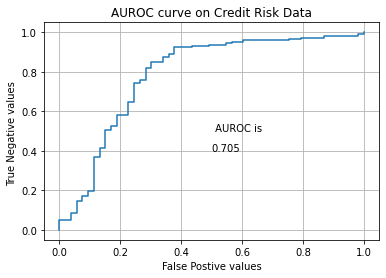

In [104]:
plt.plot(fpr, tpr )
plt.xlabel("False Postive values")
plt.ylabel("True Negative values ")
plt.title("AUROC curve on Credit Risk Data")
plt.grid()
plt.text(x = .5 , y = .5 , s =" AUROC is ")
plt.text(x = .5 , y = .4 , s = Area)

In [105]:
#  problems statemet 2

In [120]:
pred_prob_full  = glm.predict_proba(cr.iloc[: , 0: -1])

In [121]:
pred_prob_full  = pd.DataFrame(pred_prob_full)

In [124]:
pred_prob_full  = pred_prob_full.rename(columns= {pred_prob_full.columns[0]  :'Prob0'  , 
                                                  pred_prob_full.columns[1]  : 'Prob1'})

In [128]:
cr = pd.read_csv(r"C:\Users\pranj\OneDrive\Documents\CreditRisk.csv")
cr.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [129]:
pred_prob_full['LoanIdCustomer']   = cr.Loan_ID

In [130]:
pred_prob_full.head()

,Prob0,Prob1,LoanIdCustomer
0,0.113745,0.886255,LP001002
1,0.204137,0.795863,LP001003
2,0.059720,0.940280,LP001005
3,0.121637,0.878363,LP001006
4,0.113329,0.886671,LP001008


In [132]:
pred_prob_full  =   pred_prob_full.sort_values('Prob1', ascending= False)
pred_prob_full

,Prob0,Prob1,LoanIdCustomer
686,0.031083,0.968917,LP001375
14,0.034360,0.965640,LP001030
575,0.034560,0.965440,LP002868
164,0.034569,0.965431,LP001572
133,0.035527,0.964473,LP001482
...,...,...,...
177,0.835557,0.164443,LP001610
696,0.835929,0.164071,LP001445
925,0.860293,0.139707,LP002747
639,0.864353,0.135647,LP001153
